In [1]:
import pandas as pd
import pyarrow


In [2]:
careers = bbl.load_pitching(coalesce_type=bbl.CoalesceMode.PLAYER_CAREER, drop_cols=['bfp']).sort_values('bfp', ascending=False)
careers

,l,g,gs,cg,sho,sv,ip_outs,h,er,hr,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,gidp
player_id,,,,,,,,,,,,,,,,,,,,,
youngcy01,315,906,815,749,76,18,22068,7092,2147,138,...,0.0,156,161.0,3,29579.0,84,3167,0.0,0.0,0.0
galvipu01,310,705,688,646,57,2,18010,6405,1903,121,...,0.0,221,61.0,2,25415.0,19,3352,0.0,0.0,0.0
johnswa01,279,802,666,531,110,34,17744,4913,1424,97,...,0.0,155,203.0,4,23642.0,129,1902,0.0,0.0,0.0
niekrph01,274,864,716,245,45,29,16213,5044,2012,482,...,86.0,226,123.0,42,22677.0,83,2337,167.0,87.0,292.0
ryanno01,292,807,773,222,61,3,16158,3923,1911,321,...,78.0,277,158.0,33,22575.0,13,2178,191.0,140.0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
valenda01,0,1,0,0,0,0,1,0,0,0,...,0.0,0,0.0,0,1.0,1,0,0.0,0.0,0.0
kellydo01,0,1,0,0,0,0,1,0,0,0,...,0.0,0,0.0,0,1.0,1,0,0.0,0.0,0.0
chaseha01,0,1,0,0,0,0,1,0,0,0,...,0.0,0,0.0,0,1.0,0,0,0.0,0.0,0.0


In [3]:
careers['k%'] = careers['so']/careers['bfp']
careers['cummax_k%'] = careers['k%'].cummax()
all_time_leaders = (careers[careers['k%']==careers['cummax_k%']]) \
    .sort_values('k%', ascending=False)

all_time_leaders

,l,g,gs,cg,sho,sv,ip_outs,h,er,hr,...,hbp,bk,bfp,gf,r,sh,sf,gidp,k%,cummax_k%
player_id,,,,,,,,,,,,,,,,,,,,,
sheldsc01,0,1,0,0,0,0,1,0,0,0,...,0.0,0,1.0,0,0,0.0,0.0,0.0,1.000000,1.000000
seitzke01,0,1,0,0,0,0,1,0,0,0,...,0.0,0,1.0,1,0,0.0,0.0,0.0,1.000000,1.000000
valenda01,0,1,0,0,0,0,1,0,0,0,...,0.0,0,1.0,1,0,0.0,0.0,0.0,1.000000,1.000000
niesoch01,0,2,0,0,0,0,6,1,1,1,...,0.0,0,8.0,1,1,0.0,0.0,0.0,0.625000,0.625000
karinja01,2,32,0,0,0,1,97,17,9,1,...,0.0,0,131.0,8,10,1.0,5.0,1.0,0.465649,0.465649
haderjo01,11,172,0,0,0,62,671,110,63,31,...,12.0,1,861.0,79,66,2.0,3.0,7.0,0.441347,0.441347
chapmar01,27,563,0,0,0,276,1642,306,137,29,...,26.0,2,2196.0,419,150,3.0,9.0,19.0,0.412113,0.412113
kimbrcr01,24,583,0,0,0,348,1706,316,137,46,...,23.0,0,2252.0,477,146,7.0,4.0,24.0,0.411190,0.411190
janseke01,22,632,0,0,0,312,1908,414,169,59,...,24.0,8,2502.0,467,179,5.0,11.0,17.0,0.374101,0.374101


In [4]:
people = pd.read_parquet('../data/bd/people.parquet')

In [5]:
def write_output_row(row):
    name = f'{row["name_first"]} {row["name_last"]}'
    kpct = 100*row["k%"]
    k = int(row['so'])
    bfp = int(row['bfp'])
    print(f'{name:<18} {kpct:>6.1f}% {k:>5} {bfp:>6}');

pd.merge(all_time_leaders, people, on='player_id').apply(write_output_row, axis=1)
None

Scott Sheldon       100.0%     1      1
Kevin Seitzer       100.0%     1      1
Danny Valencia      100.0%     1      1
Chuck Nieson         62.5%     5      8
James Karinchak      46.6%    61    131
Josh Hader           44.1%   380    861
Aroldis Chapman      41.2%   905   2196
Craig Kimbrel        41.1%   926   2252
Kenley Jansen        37.4%   936   2502
Billy Wagner         33.2%  1196   3600
Chris Sale           30.7%  2007   6544
Max Scherzer         29.1%  2784   9573
Randy Johnson        28.6%  4875  17067
Nolan Ryan           25.3%  5714  22575
Walter Johnson       14.8%  3509  23642
Cy Young              9.5%  2803  29579


<AxesSubplot:xlabel='bfp'>

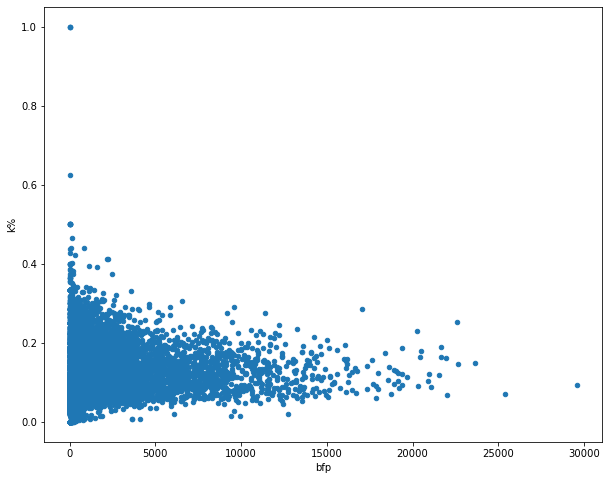

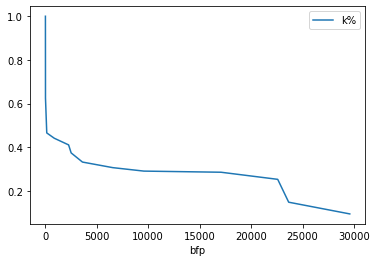

In [6]:
careers.plot.scatter(x='bfp', y='k%', figsize=(10,8))
all_time_leaders.plot.line(x='bfp', y='k%')

<AxesSubplot:xlabel='bfp', ylabel='so'>

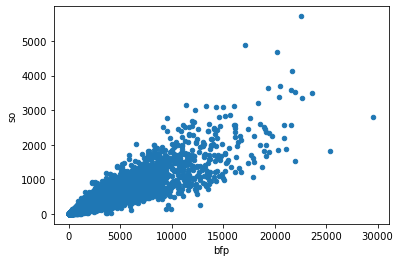

In [7]:
careers.plot.scatter(x='bfp', y='so')